In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Some basic options in pandas for better readability and usage
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None) #automatic linebreaks and multiline cells

In [3]:
df = pd.read_csv('../input/indian-food-101/indian_food.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


# Data Cleaning and Transformation

In [5]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

region    1
dtype: int64

'region' has a missing value.<br>
Since 'region' is an important atrribute, we cannot replace its value with a default one. Lets see if we can replace the value with anything first.

In [6]:
 df[df.isnull().any(axis=1)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy seeds, edible gum, semolina",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


This record has State as Uttar Pradesh, let us check other records with state Uttar Pradesh.

In [7]:
df[df['state'] == 'Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum powder",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel seeds",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour, ginger, chillies",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, garam masala powder",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy seeds, edible gum, semolina",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


Here we can see that region for Uttar Pradesh is North. So we can simply update the null value with North for this case.

In [8]:
df.loc[df.state=='Uttar Pradesh','region'] = 'North'
df[df['state'] == 'Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"Firm white pumpkin, sugar, kitchen lime, alum powder",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"Moong dal, rava, garam masala, dough, fennel seeds",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour, ginger, chillies",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, garam masala powder",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy seeds, edible gum, semolina",vegetarian,10,25,sweet,dessert,Uttar Pradesh,North


In [9]:
#updated in version 2 to not remove the record but replace it with a value.

# df = df.dropna(subset=['region'])
# print('Missing "region" values after removal : ', df['region'].isnull().sum())

In [10]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [11]:
df.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [12]:
df.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central'],
      dtype=object)

In [13]:
df.state.value_counts()

state
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64

Since there are 24 records with '-1' as State, so we shall convert them to 'Others' so that we do not lose any data. 
<br>
The same can be seen with region, flavor_profile, prep_time and cook_time as well. So we will replace them with 'Others' for region and flavor_profile and 0 for prep_time and cook_time.

In [14]:
df.loc[df['state'] == '-1', 'state'] = 'Others'
df.loc[df['region'] == '-1', 'region'] = 'Others'
df.loc[df['flavor_profile'] == '-1', 'flavor_profile'] = 'other'

df.loc[df['prep_time'] == -1, 'prep_time'] = 0
df.loc[df['cook_time'] == -1, 'cook_time'] = 0

In [15]:
df.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [16]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East


Let us transform the 'ingredients' column from a comma seperated single string to a list of ingredients.

In [17]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East


In [18]:
# Turning the ingredients column into list instead of a single string
ingredients = []

for row in df['ingredients']:
    item = row.lower().strip().split(',')
    ingredients.append(item)
    
df['ingredients'] = ingredients
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom]",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water]",vegetarian,15,40,sweet,dessert,West Bengal,East


New column 'total_time' added which is the summation of 'prep_time' and 'cook_time'

In [19]:
df['total_time'] = df.prep_time + df.cook_time
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"[maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"[gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"[carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"[flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom]",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"[milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water]",vegetarian,15,40,sweet,dessert,West Bengal,East,55


In [20]:
df.to_csv('indianfood101dataset-cleaned.csv', index=False)

# Analysis and Vizualizations

Text(0.5, 1.0, 'Vegetarian vs. Non-Vegetarian recipes')

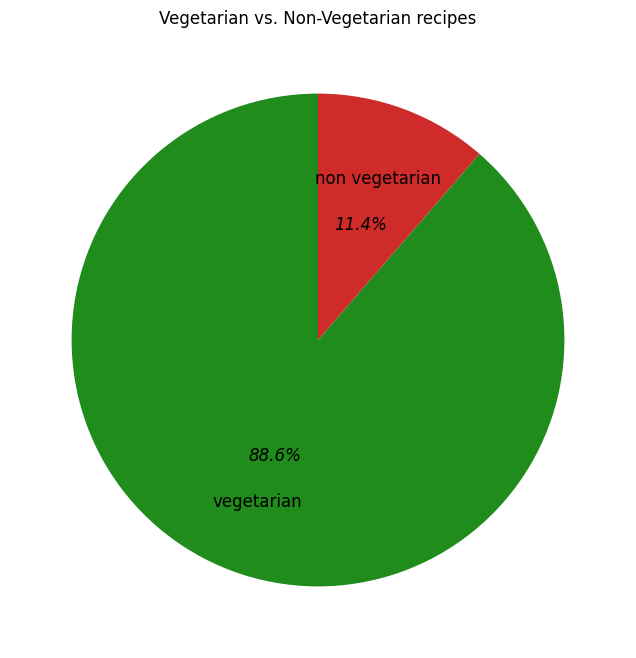

In [21]:
diet_pie = df['diet'].value_counts().reset_index()


plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(diet_pie['count'], 
                                    labels=diet_pie['diet'], 
                                    autopct='%1.1f%%', 
                                    textprops={'fontsize':12}, 
                                    colors=['#208c1c','#cf2b2b'],
                                    startangle = 90, 
                                    labeldistance=0.7,
                                    pctdistance=0.5)

# Customize text labels
for text in texts:
    text.set_horizontalalignment('center') 
# Customize percent labels
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')
    
plt.title("Vegetarian vs. Non-Vegetarian recipes")


Text(0, 0.5, 'Number of dishes')

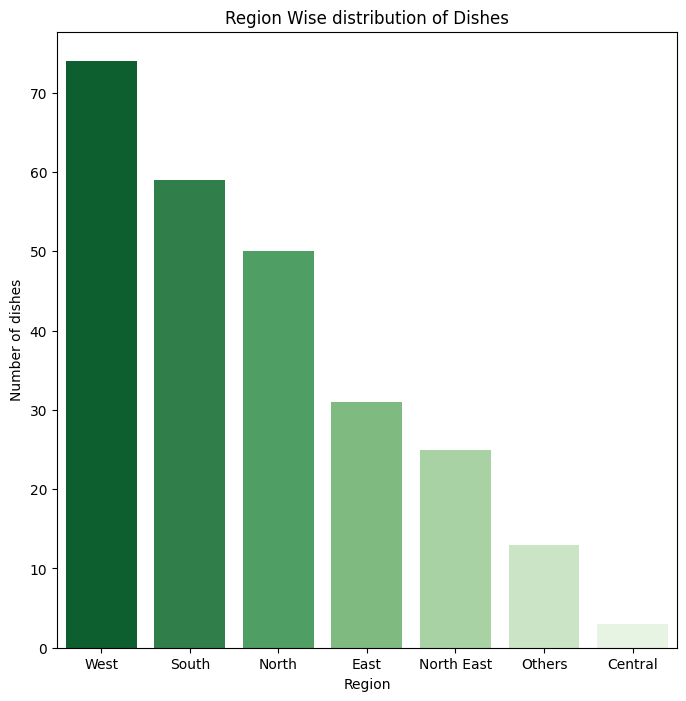

In [22]:
regions = df['region'].value_counts()

plt.figure(figsize=(8,8))
sns.barplot(x=regions.index, y=regions.values, palette='Greens_r')
plt.title("Region Wise distribution of Dishes")
plt.xlabel("Region")
plt.ylabel("Number of dishes")

Text(0, 0.5, 'Number of dishes')

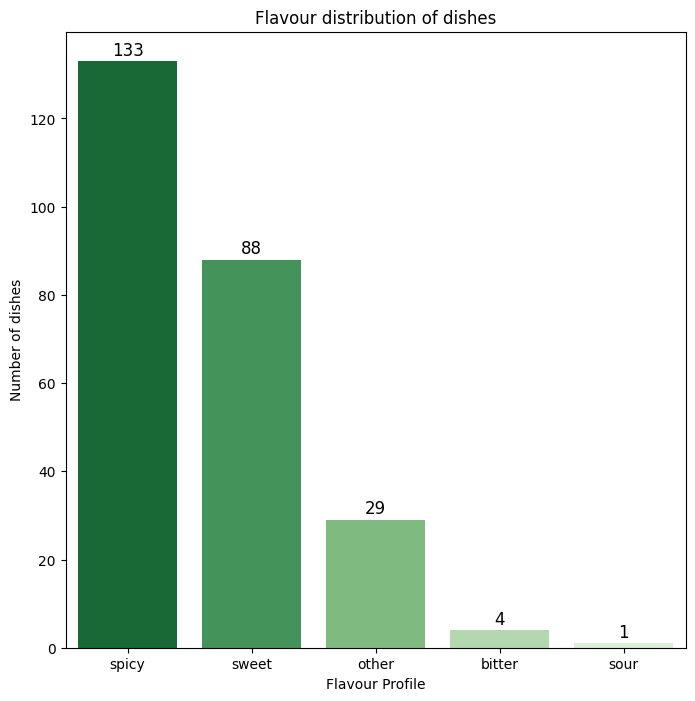

In [23]:
flavour = df['flavor_profile'].value_counts().reset_index()
# flavour = flavour[flavour['flavor_profile'] != 'other']


plt.figure(figsize=(8, 8))
plots = sns.barplot(x=flavour['flavor_profile'], y=flavour['count'], palette='Greens_r')
for bar in plots.patches:
    plots.annotate(int(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Flavour distribution of dishes")
plt.xlabel("Flavour Profile")
plt.ylabel("Number of dishes")

Lets look at the distribution of Spicy food across India.

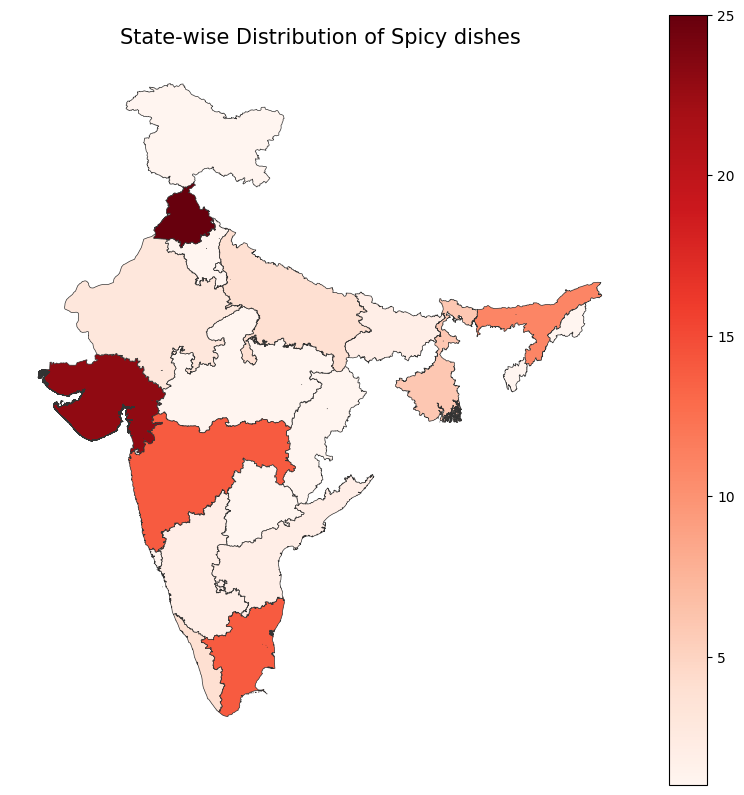

In [24]:
#shape file from India GIS dataset
shp_ind = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
#spicy food subset
spicy_only = df[df['flavor_profile'] == 'spicy']
spicy_state = spicy_only.state.value_counts().reset_index()
spicy_state.columns = ['state','count']

#merged shp file with state wise spicy dishes
merged = shp_ind.set_index('st_nm').join(spicy_state.set_index('state'))

#plotting
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Spicy dishes',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='count', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [25]:
# Turning the ingredients column into list instead of a single string
spicy_ingredients = []
df_spicy = df[df['flavor_profile'] == 'spicy']

for row in df_spicy['ingredients']:
    #already split this column while cleaning data
    spicy_ingredients.append(row)

In [26]:
#generate list of all ingredients with their counts
#only for spicy dishes

spicy_ing_flattened = []
for item in spicy_ingredients:
    spicy_ing_flattened.extend(item)
    
spicy_ing_flattened = [x.strip(' ') for x in spicy_ing_flattened]

spicy_ing_true = pd.Series(spicy_ing_flattened).value_counts()

Text(0, 0.5, 'Ingredient Name')

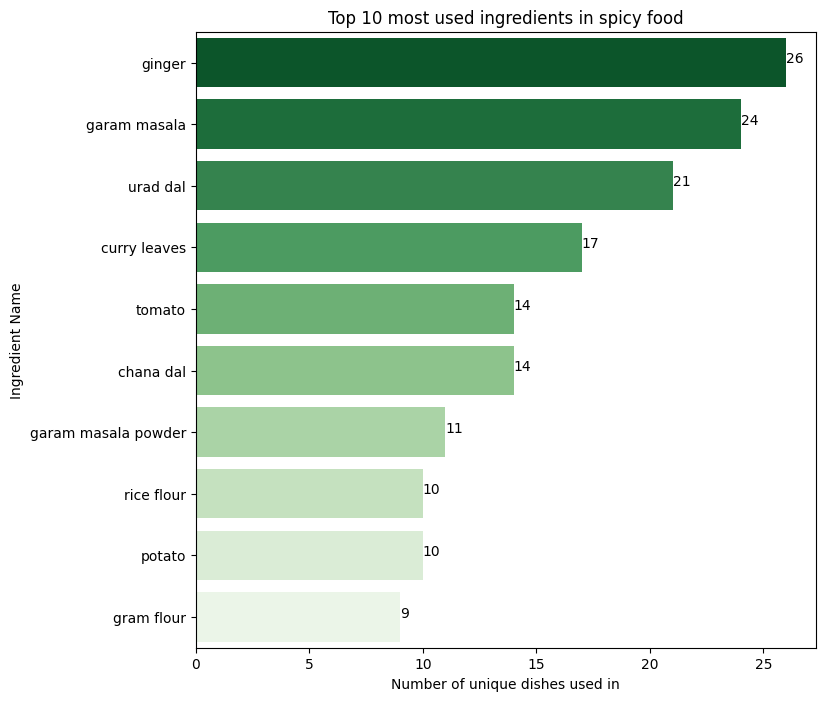

In [27]:
top_spicy_ingredients = spicy_ing_true.head(10)

plt.figure(figsize=(8, 8))
plots = sns.barplot(x=top_spicy_ingredients.values, y=top_spicy_ingredients.index, palette='Greens_r')
for bar in plots.patches:
    plots.annotate(int(bar.get_width()), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2))

# plt.annotate(text, xy, xytext=None, arrowprops=None, **kwargs)
# text − the text string to be displayed as the annotation
# xy − the (x, y) coordinates of the point to be annotated 

plt.title("Top 10 most used ingredients in spicy food")
plt.xlabel("Number of unique dishes used in")
plt.ylabel("Ingredient Name")

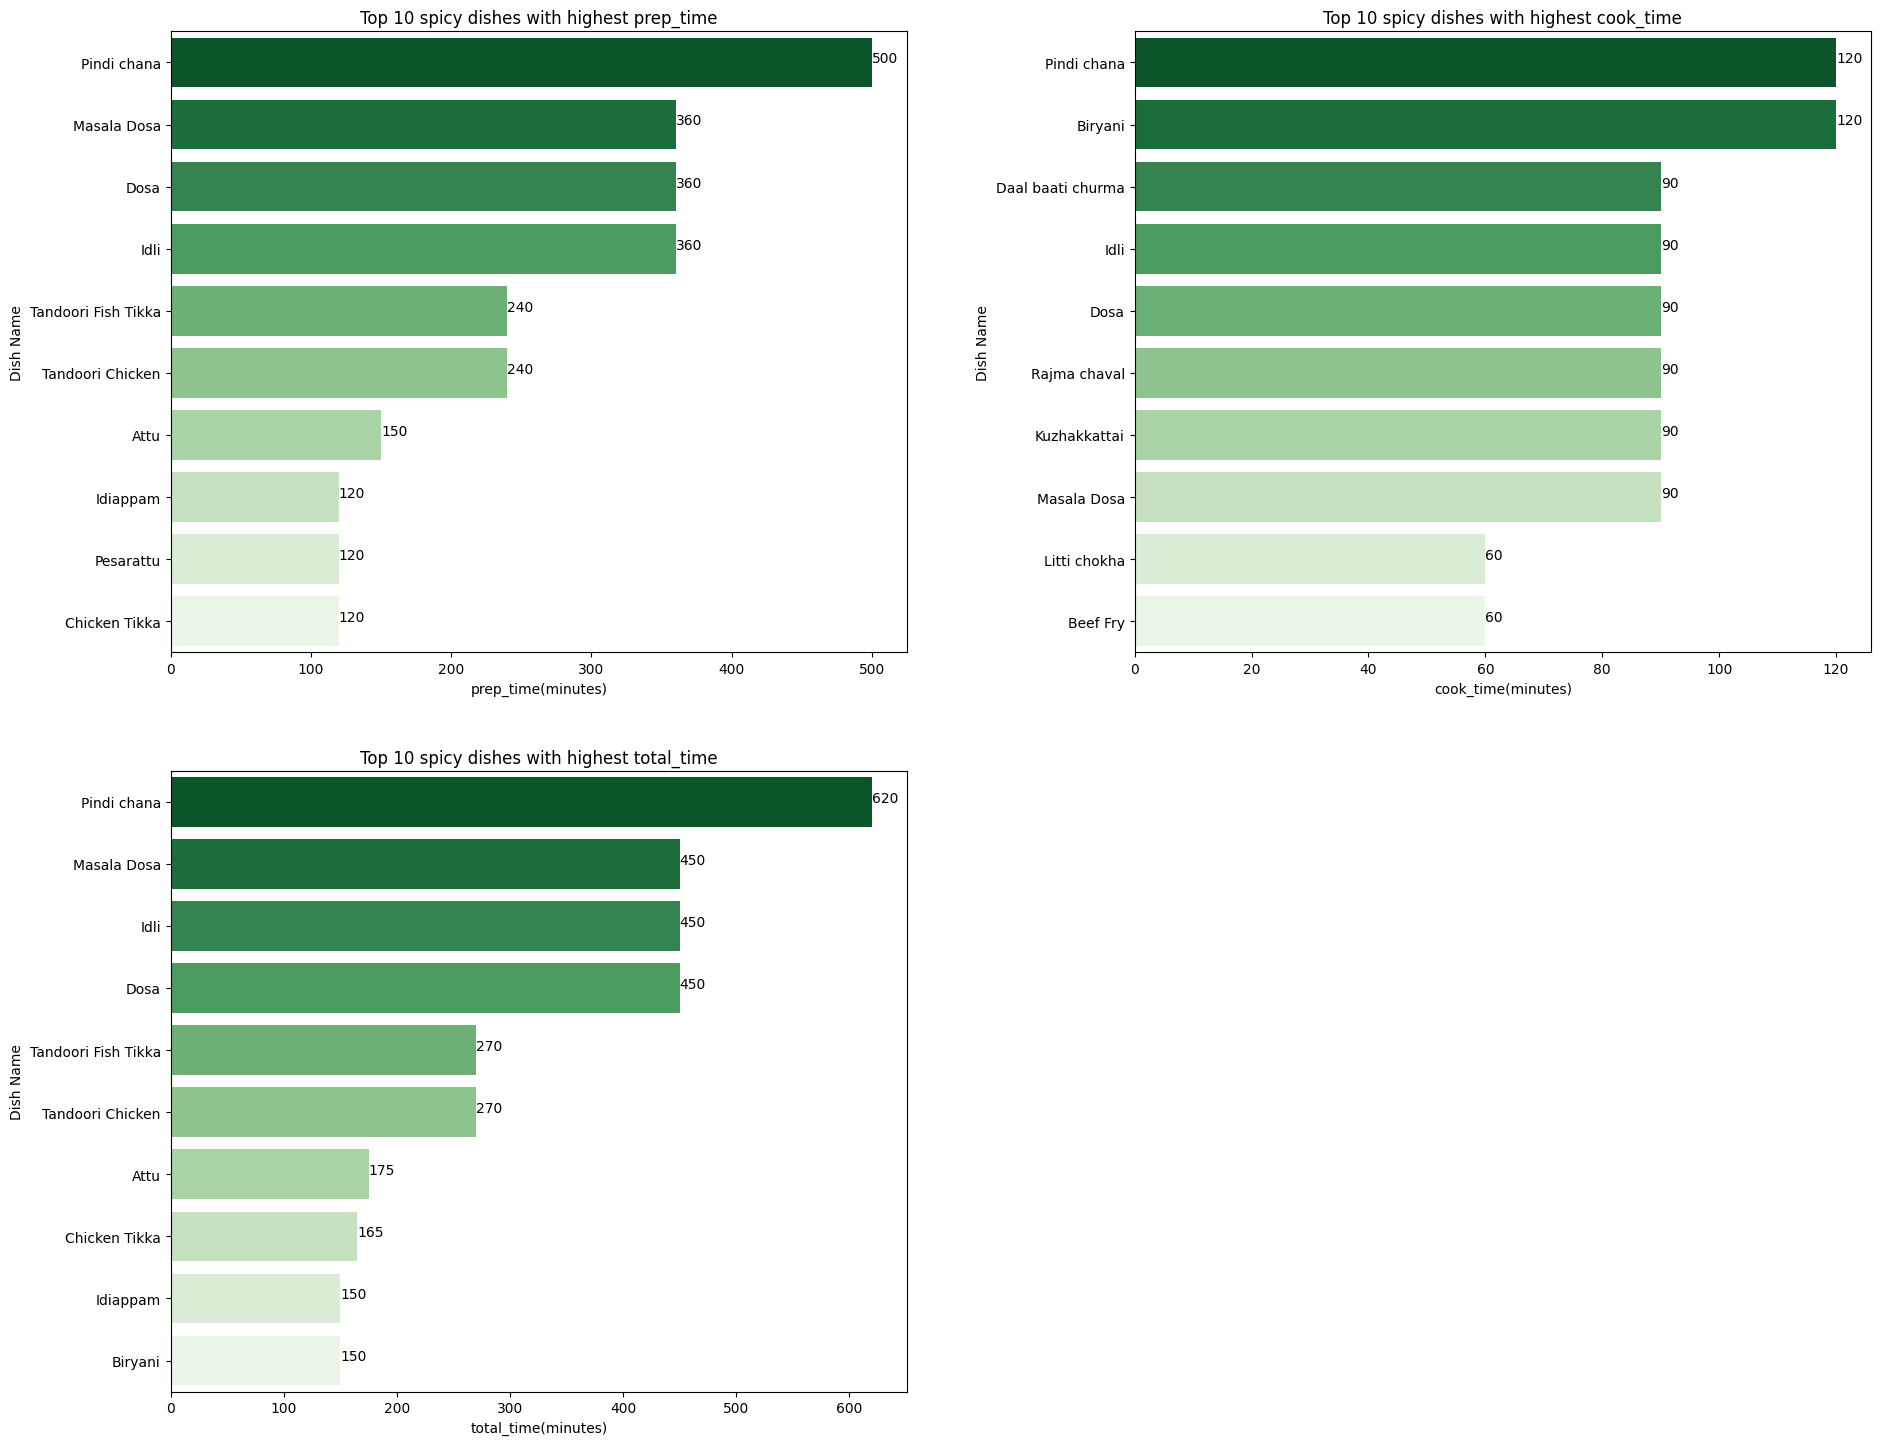

In [28]:
time_plots = ['prep_time','cook_time','total_time']
plt.figure(figsize=(20, 30))

for i, feature in enumerate(time_plots, start=1):
    plt.subplot(4, 2, i)
    plt.tight_layout(pad=5.0) #spacing in between the plots
    df_plot = df_spicy.sort_values(feature, ascending = False).head(10)
    plots = sns.barplot(x=df_plot[feature],y=df_plot['name'], palette='Greens_r')
    for bar in plots.patches:
        plots.annotate(int(bar.get_width()), 
                        (bar.get_width(), bar.get_y() + bar.get_height() / 2))
    plt.title("Top 10 spicy dishes with highest " + feature)
    plt.xlabel(feature + "(minutes)")
    plt.ylabel("Dish Name")

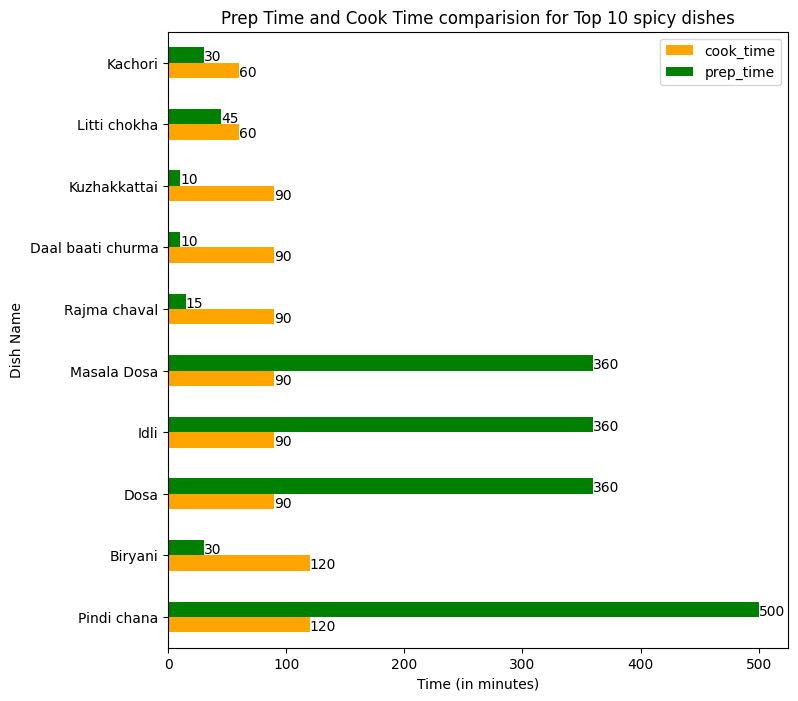

In [29]:
time_plots = ['cook_time', 'prep_time']

df_plot = df_spicy.sort_values(time_plots, ascending = [False, False]).head(10)
plots = df_plot.plot.barh(x='name' , y=time_plots , color =['orange', 'green'],
                        title='Prep Time and Cook Time comparision for Top 10 spicy dishes',
                        xlabel='Time (in minutes)', ylabel='Dish Name', figsize=(8,8))
for bar in plots.patches:
    plots.annotate(int(bar.get_width()), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 8), fontsize=10)

Text(0, 0.5, 'Cooking time (minutes)')

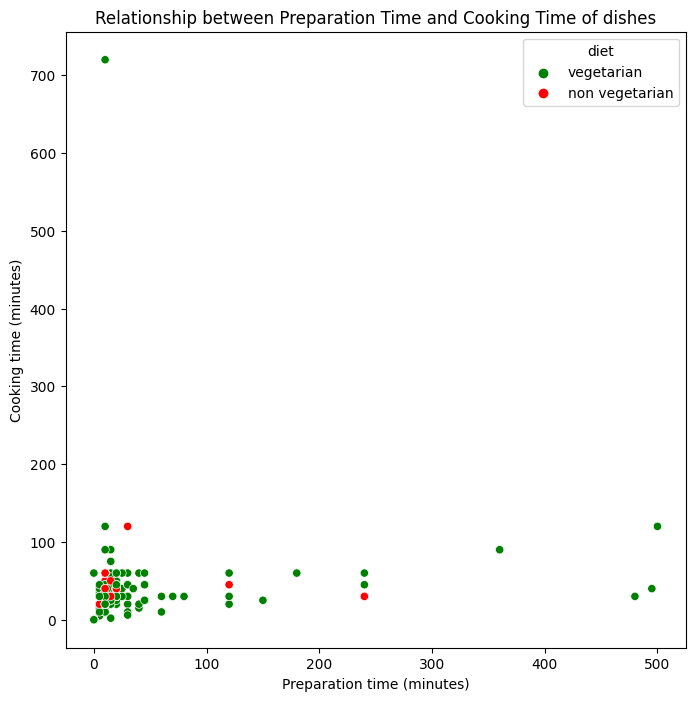

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='prep_time', y='cook_time', hue='diet', palette=['green','red'])
plt.title("Relationship between Preparation Time and Cooking Time of dishes")
plt.xlabel("Preparation time (minutes)")
plt.ylabel("Cooking time (minutes)")

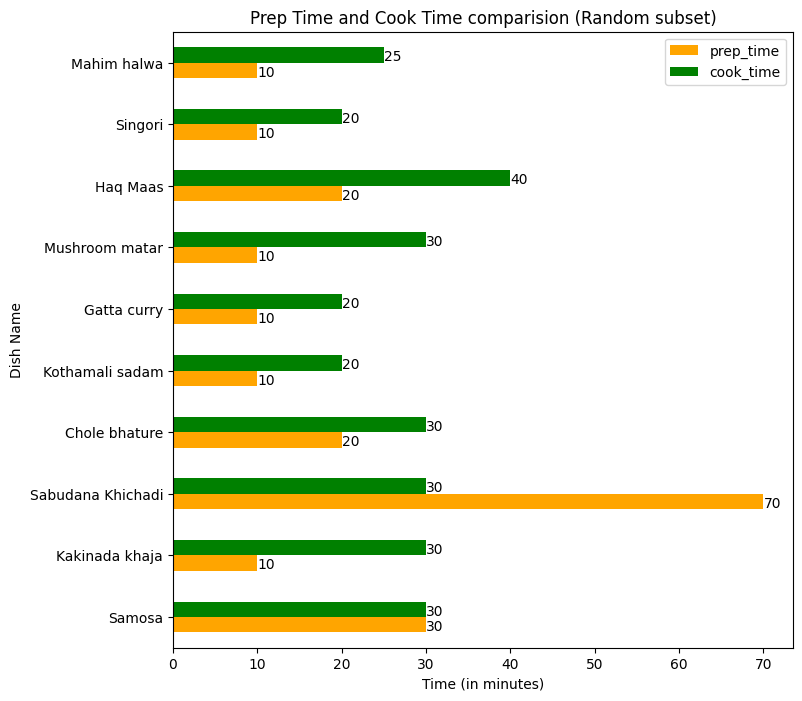

In [31]:
time_plot_sample = df.query('prep_time > 0 & cook_time > 0').sample(10)

plots = time_plot_sample.plot.barh(x='name' , y=['prep_time', 'cook_time'] , color =['orange', 'green'],
                                  title='Prep Time and Cook Time comparision (Random subset)',
                                  xlabel='Time (in minutes)', ylabel='Dish Name', figsize=(8,8))
for bar in plots.patches:
    plots.annotate(int(bar.get_width()), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 8), fontsize=10)

# Fidings
<hr/>

* The majority of dishes in this dataset are vegetarian.
* The dishes predominantly hails from the Western region.
* Most dishes are notably spicy.
* Ginger, Garam Masala, and Urad Dal rank among the most frequently utilized ingredients in spicy cuisine.
* Spicy dishes are notably prevalent in regions such as Punjab, Gujarat, Maharashtra, Assam, and Tamil Nadu.
* Pindi Chana stands out as a dish requiring substantial preparation time. Similarly, Masala Dosa, Idli, and Dosa also demand considerable preparation.
* Most dishes boast preparation and cooking times of less than two hours.